In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
# Load the CSV file
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
top_publishers = publisher_counts.head(10)
top_publishers


Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: publisher, dtype: int64

/tmp/ipykernel_97958/2296406934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


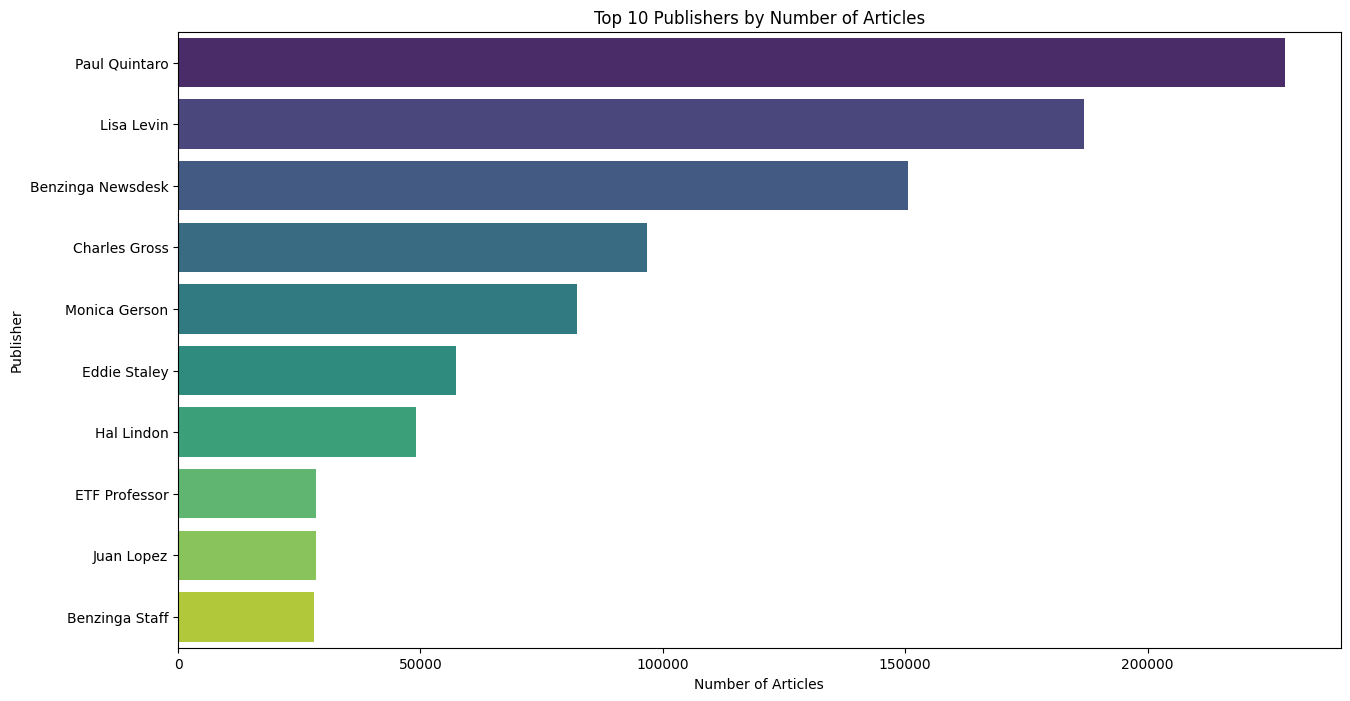

In [4]:
# Plot the top publishers
plt.figure(figsize=(15, 8))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


In [5]:
# Analyze the type of news reported by top publishers
# For simplicity, we'll categorize news by keywords in headlines

# Define keywords for different types of news
news_types = {
    'Price Target': ['price target', 'raises price target', 'lowers price target'],
    'Stock Movement': ['stocks moving', 'biggest movers'],
    'Earnings': ['Q2 EPS', 'Q2 earnings', 'EPS and sales results'],
    'General': ['trading higher', 'trading lower', 'reports', 'maintains']
}

# Function to categorize headlines based on keywords
def categorize_headline(headline):
    for category, keywords in news_types.items():
        if any(keyword in headline.lower() for keyword in keywords):
            return category
    return 'Other'

# Apply the function to categorize headlines
df['news_type'] = df['headline'].apply(categorize_headline)

# Analyze the type of news reported by top publishers
news_by_publisher = df[df['publisher'].isin(top_publishers.index)].groupby(['publisher', 'news_type']).size().unstack().fillna(0)

news_by_publisher


news_type,General,Other,Price Target,Stock Movement
publisher,,,,
Benzinga Newsdesk,40296.0,105269.0,3023.0,1896.0
Benzinga Staff,4324.0,23531.0,259.0,0.0
Charles Gross,5880.0,90759.0,78.0,15.0
ETF Professor,54.0,28435.0,0.0,0.0
Eddie Staley,12046.0,43892.0,1316.0,0.0
Hal Lindon,12187.0,36410.0,439.0,11.0
Juan Lopez,15374.0,13064.0,0.0,0.0
Lisa Levin,1100.0,131122.0,4694.0,50063.0
Monica Gerson,747.0,79142.0,547.0,1944.0


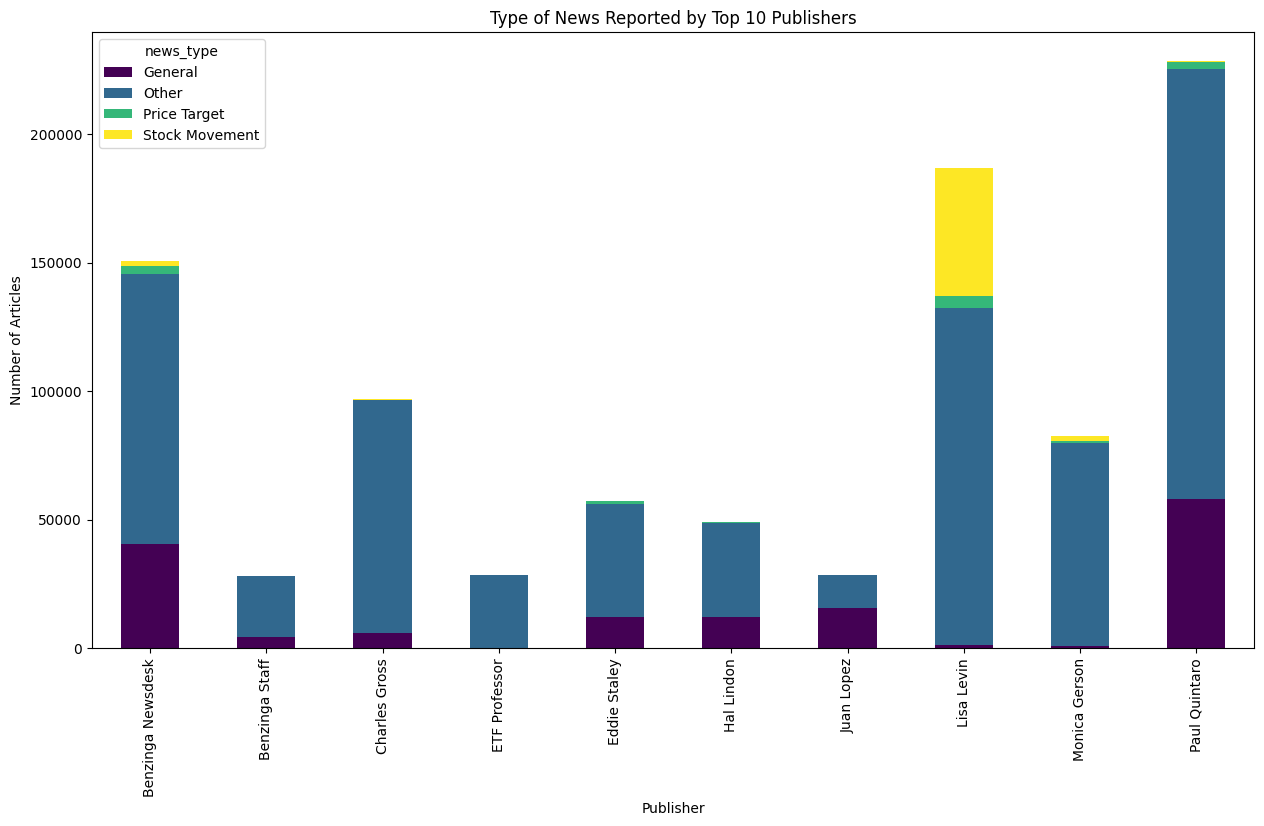

In [6]:
# Plot the type of news reported by top publishers
news_by_publisher.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Type of News Reported by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


In [7]:
# Function to extract domain from email address
def extract_domain(email):
    match = re.search(r'@([\w\.-]+)', email)
    return match.group(1) if match else email

# Apply the function to extract domains
df['domain'] = df['publisher'].apply(extract_domain)

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
top_domains


Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: domain, dtype: int64

In [ ]:
# Plot the top domains
plt.figure(figsize=(15, 8))
sns.barplot(x=top_domains.values, y=top_domains.index, palette='viridis')
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()
